## KNN

The definition of KNN algorithm: given a training data set, for a new input instance, find the k closest instances in the training set, and the new input belongs to the same class of the majority of the k instances.

From the brief introduction of KNN, we can find out that it is an atypical supervised machine learning algorithm without complex mathematical theory behind it. Here are some key points of this algorithm. First, how to find the nearest neighbor, which is how do we measure the distance in the feature vector space. And then, how to choose the value of k. The last one is to choose a classification decision rule. 

For the measure of distance, it can be regarded as similarity measurement in KNN, which is the similarity of two instances in the feature space. In machine learning, the commonly used methods include Euclidean distance, Manhattan distance, cosine distance, Chebyshev distance, etc. In KNN, Euclidean distance is mostly used to measure distance, which is also called L2 distance, and its formula is shown as below:
$$
L_{2}\left(x_{i}, x_{j}\right)=\left(\sum_{l=1}^{n}\left|x_{i}^{(l)}-x_{j}^{(l)}\right|^{2}\right)^{\frac{1}{2}}
$$

For the selection of k value, the size of it has a significant impact on the classification. When the k value is small, it means that only few neighbors that are quite close to the instance would affect the classification. Meanwhile, the prediction would be very sensitive to these neighbors, so the classifier has poor noise immunity and is prone to overfitting. When the k value is too large, the classifier would make the prediction based on the large scale of neighbors. In this situation, The model becomes simple and corresponding classification error will also increase, resulting in a certain degree of underfitting. In general, we need to use cross-validation to find the proper k value.

For the classification decision rule, majority voting method is commonly used in KNN. Some other methods are also can be used for some specific situations.

In [1]:
import numpy as np
from collections import Counter
import random
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.utils import shuffle 

iris = datasets.load_iris()

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest' 
plt.rcParams['image.cmap'] = 'gray'

In [2]:
X, y = shuffle(iris.data, iris.target, random_state=13) 
X = X.astype(np.float32)

offset = int(X.shape[0] * 0.7)
X_train, y_train = X[:offset], y[:offset] 
X_test, y_test = X[offset:], y[offset:] 
y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

print('X_train=', X_train.shape) 
print('X_test=', X_test.shape) 
print('y_train=', y_train.shape) 
print('y_test=', y_test.shape)

X_train= (105, 4)
X_test= (45, 4)
y_train= (105, 1)
y_test= (45, 1)


In [17]:
# define the function to measure L2 distance
def compute_distances(X):
    num_test = X.shape[0]
    num_train = X_train.shape[0]
    dists = np.zeros((num_test, num_train))
    M = np.dot(X, X_train.T)
    te = np.square(X).sum(axis=1)
    tr = np.square(X_train).sum(axis=1)
    dists = np.sqrt(np.matrix(te).T + tr - 2*M) 
    return dists

In [18]:
dists = compute_distances(X_test) 
print(dists.shape)

(45, 105)


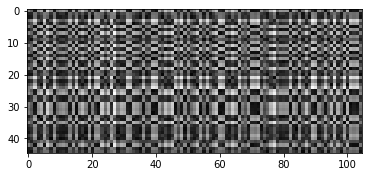

In [8]:
plt.imshow(dists, interpolation='none') 
plt.show()

In [14]:
# use majority voting to make the prediction, here assume the k value is 1
def predict_labels(dists, k=1): 
    num_test = dists.shape[0]
    y_pred = np.zeros(num_test)
    for i in range(num_test):
        closest_y = []
        # argsort: order the elements in a list from small to large, and then extract their index into a new list
        # flatten: switch the data into 1 dimension
        labels = y_train[np.argsort(dists[i, :])].flatten() 
        closest_y = labels[0:k]
        c = Counter(closest_y)
        y_pred[i] = c.most_common(1)[0][0] 
    return y_pred

In [15]:
y_test_pred = predict_labels(dists, k=1)
y_test_pred = y_test_pred.reshape((-1, 1))
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / X_test.shape[0]
print('Got %d / %d correct => accuracy: %f' % (num_correct, X_test.shape[0], accuracy))

Got 44 / 45 correct => accuracy: 0.977778


In [19]:
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

X_train_folds = [] 
y_train_folds = []
X_train_folds = np.array_split(X_train, num_folds) 
y_train_folds = np.array_split(y_train, num_folds) 
k_to_accuracies = {}
for k in k_choices:
    for fold in range(num_folds):
        # divide a validation set from training set as a test set
        validation_X_test = X_train_folds[fold]
        validation_y_test = y_train_folds[fold]
        temp_X_train = np.concatenate(X_train_folds[:fold] + X_train_folds[fold + 1:]) 
        temp_y_train = np.concatenate(y_train_folds[:fold] + y_train_folds[fold + 1:])
        temp_dists = compute_distances(validation_X_test)
        temp_y_test_pred = predict_labels(temp_dists, k=k)
        temp_y_test_pred = temp_y_test_pred.reshape((-1, 1))
        # check the accuracy of classification
        num_correct = np.sum(temp_y_test_pred == validation_y_test)
        num_test = validation_X_test.shape[0]
        accuracy = float(num_correct) / num_test
        k_to_accuracies[k] = k_to_accuracies.get(k,[]) + [accuracy]

# print the accuracy of different under different folds 
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

k = 1, accuracy = 1.000000
k = 1, accuracy = 1.000000
k = 1, accuracy = 1.000000
k = 1, accuracy = 1.000000
k = 1, accuracy = 1.000000
k = 3, accuracy = 1.000000
k = 3, accuracy = 1.000000
k = 3, accuracy = 0.952381
k = 3, accuracy = 0.857143
k = 3, accuracy = 0.952381
k = 5, accuracy = 1.000000
k = 5, accuracy = 1.000000
k = 5, accuracy = 0.952381
k = 5, accuracy = 0.904762
k = 5, accuracy = 0.952381
k = 8, accuracy = 1.000000
k = 8, accuracy = 1.000000
k = 8, accuracy = 1.000000
k = 8, accuracy = 0.904762
k = 8, accuracy = 1.000000
k = 10, accuracy = 1.000000
k = 10, accuracy = 1.000000
k = 10, accuracy = 1.000000
k = 10, accuracy = 0.904762
k = 10, accuracy = 1.000000
k = 12, accuracy = 1.000000
k = 12, accuracy = 1.000000
k = 12, accuracy = 1.000000
k = 12, accuracy = 0.904762
k = 12, accuracy = 1.000000
k = 15, accuracy = 1.000000
k = 15, accuracy = 1.000000
k = 15, accuracy = 0.952381
k = 15, accuracy = 0.904762
k = 15, accuracy = 1.000000
k = 20, accuracy = 1.000000
k = 20, accu

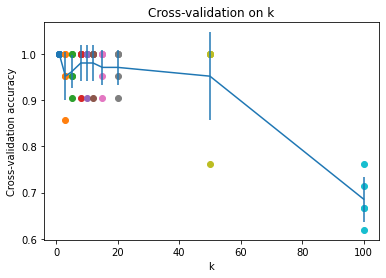

In [20]:
for k in k_choices:
    accuracies = k_to_accuracies[k] 
    plt.scatter([k] * len(accuracies), accuracies)

accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())]) 
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())]) 
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std) 
plt.title('Cross-validation on k')
plt.xlabel('k') 
plt.ylabel('Cross-validation accuracy') 
plt.show()

In [21]:
best_k = k_choices[np.argmax(accuracies_mean)] 
print(best_k)

1
